In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft
import pandas as pd

# https://pages.mtu.edu/~suits/notefreqs.html
# table of musical notes and respective frequencies.


# focus on electric guitar for time being as acoustic body resonates and confuses things.

samplerate, data = wavfile.read(r'guitar_notes/electric_pickup_1//notes/509.wav')
# samplerate, data = wavfile.read(r'guitar_notes/600_a_dull.wav')
data= data.reshape(2, -1)
n = data.shape[1]
t = n/samplerate
dt = t/n
freq = np.arange(n)/t
mono = data[0] # Mono sound -- channel two is stereo.
fhat = fft(mono, n)

psd = fhat*np.conj(fhat)/n

psd = np.array([x.real for x in psd]) 

# idxs_half = np.arange(1, np.floor(n / 2), dtype=np.int32)





# psd_max = psd.max()
# psd_min = psd.min()
# psd_norm = (psd-psd_min) / (psd_max-psd_min)

# tones = freq[psd_norm > 0.1]
# tone_psd = psd_norm[psd_norm > 0.1]

# df = pd.DataFrame({'tones':tones, 'psd_norm':tone_psd})
# df = df.loc[df.tones<1000]
# df.tones = df.tones.apply(lambda x: np.floor(x))
# df = df.groupby('tones').psd_norm.max().reset_index()
# df = df.sort_values('tones', )


# # # df1 = df.stack().reset_index().drop(columns=['level_0']).T
# # # df1.columns = df1.iloc[0,:]
# # plt.figure(figsize=(20,4))
# # plt.plot(np.arange(0, t, dt), mono)
# # plt.xlim(3.2, 3.5)
# # plt.show()
# tone_psd_dix

# plt.plot(freq[idxs_half], psd_norm[idxs_half])
# plt.xlim(0, 300)
# plt.show()
# tone_psd_dix


# df['difference'] =df.tones.diff().fillna(0)

# idd=1
# id_array = []
# for i in range(0, (len(df.difference))):
#     if df.difference[i] < 5:
#         id_array.append(idd)
#     else:
#         idd +=1
#         id_array.append(idd)

    
# print(df)
# df['tone_id'] = id_array
# df.iloc[df.groupby('tone_id').psd_norm.idxmax()]

   tones  psd_norm  difference
0   92.0  0.486791         0.0
1   93.0  0.483075         1.0
2  185.0  0.184816        92.0
3  186.0  0.103163         1.0
4  279.0  0.543011        93.0
5  372.0  1.000000        93.0
6  373.0  0.695654         1.0
7  374.0  0.116995         1.0
8  560.0  0.102120       186.0


,tones,psd_norm,difference,tone_id
0,92.0,0.486791,0.0,1
2,185.0,0.184816,92.0,2
4,279.0,0.543011,93.0,3
5,372.0,1.000000,93.0,4
8,560.0,0.102120,186.0,5


In [198]:
def get_freqsig(wav):
    # if i is None:
    #     i=0
    samplerate, data = wavfile.read(wav)
    data= data.reshape(2, -1)
    n = data.shape[1]
    t = n/samplerate
    dt = t/n
    freq = np.arange(n)/t #+ i*1
    mono = data[0] # Mono sound -- channel two is stereo.
    fhat = fft(mono, n)
    psd = (fhat*np.conj(fhat) / n) 
    psd = np.array([x.real for x in psd])

    psd_max = psd.max()
    psd_min = psd.min()
    psd_norm = (psd-psd_min) / (psd_max-psd_min)


    tones = freq[psd_norm > 0.05]
    tone_psd = psd_norm[psd_norm > 0.05]

    df = pd.DataFrame({'tones':tones, 'psd_norm':tone_psd})
    df = df.loc[df.tones<5000]
    df.tones = df.tones.apply(lambda x: np.floor(x))
    df = df.groupby('tones').psd_norm.max().reset_index()
    
    
    df['difference'] =df.tones.diff().fillna(0)

    idd=1
    id_array = []
    for i in range(0, (len(df.difference))):
        if df.difference[i] < 5:
            id_array.append(idd)
        else:
            idd +=1
            id_array.append(idd)

    df['tone_id'] = id_array
    df = df.iloc[df.groupby('tone_id').psd_norm.idxmax()].drop(columns=['difference']).set_index('tone_id')
    f = df.sort_values('tones')
    
    idxs_half = np.arange(1, np.floor(n / 2), dtype=np.int32)
    plt.plot(freq[idxs_half], psd_norm[idxs_half], label=wav, alpha=0.5)

    return df

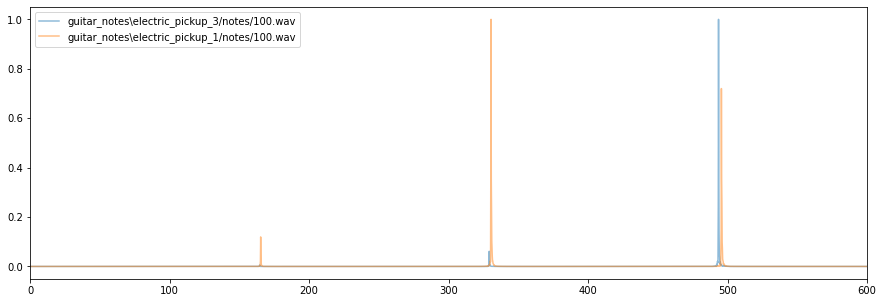

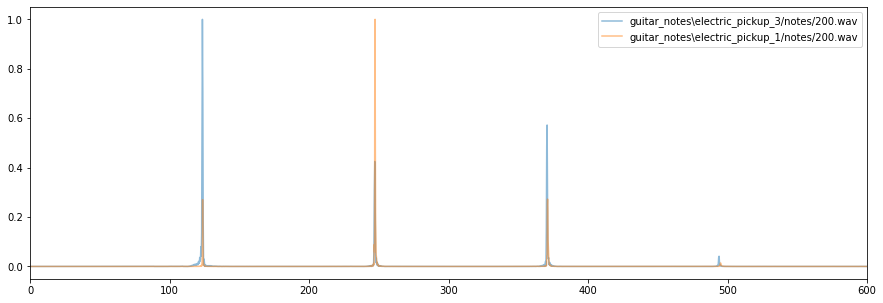

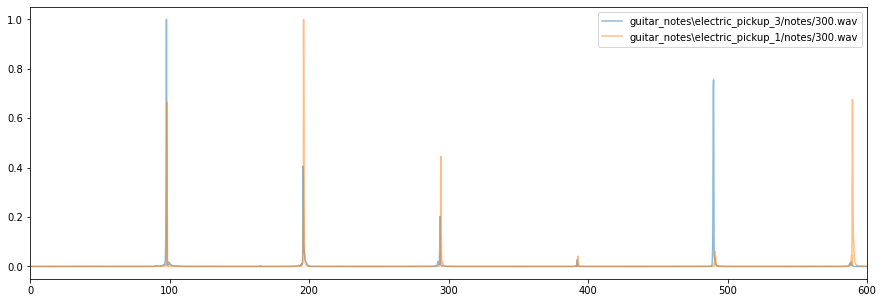

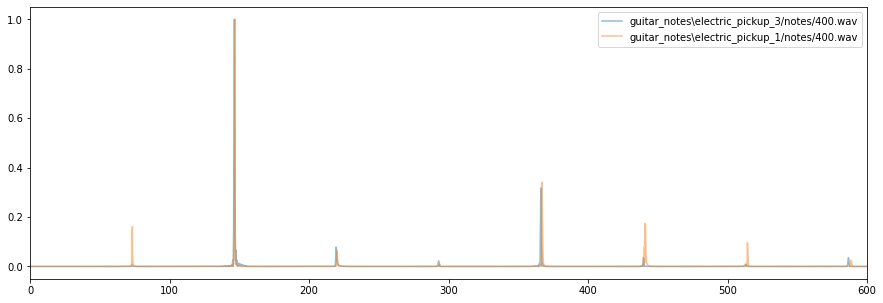

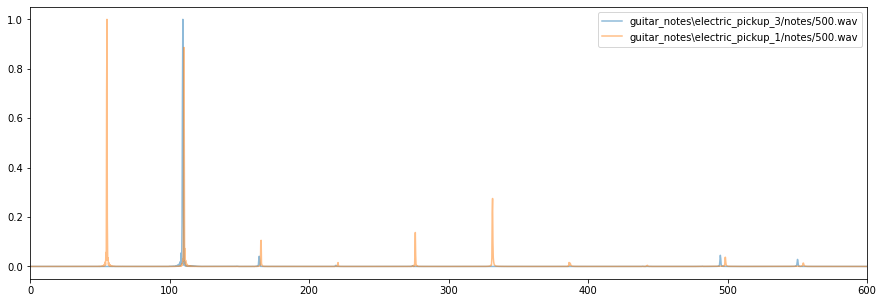

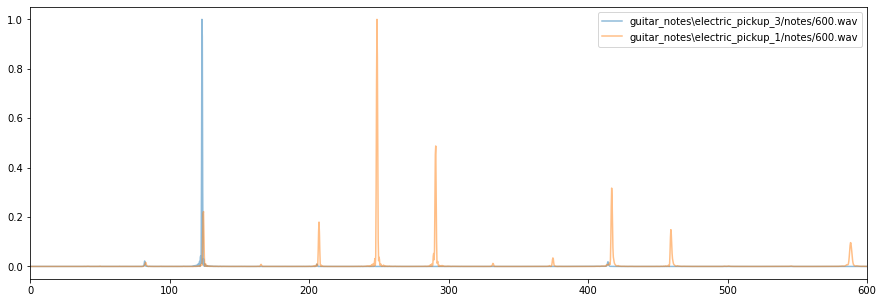

In [130]:

for i in range(1,7):
    if i not in [20]:
        plt.figure(figsize=(15, 5))
        get_freqsig(fr'guitar_notes\electric_pickup_3/notes/{i}00.wav')
        get_freqsig(fr'guitar_notes\electric_pickup_1/notes/{i}00.wav')
        # get_freqsig(fr'guitar_notes\electric_pickup_1/Recording0100.wav')
        # get_freqsig(fr'guitar_notes\electric_pickup_1/Recording0101.wav')
        plt.legend()
        plt.xlim(0,600)

In [209]:
# plt.figure(figsize=(15, 5))
for i in range(0, 3):
    if i not in [20]:
        x = get_freqsig(fr'guitar_notes/electric_pickup_1//notes/50{i}.wav')
        y = get_freqsig(fr'guitar_notes/electric_pickup_1/notes/60{i+5}.wav')
        # z = np.concatenate((x,y), axis=1)
        plt.clf()
        # axs[0].text(2,3,x)
        print('\n======', i,'======','5', x, '\n6', y, sep='\n')


0
5
         tones  psd_norm
tone_id                 
1         55.0  1.000000
2        110.0  0.886311
3        165.0  0.105484
4        276.0  0.137339
5        331.0  0.275033

6
         tones  psd_norm
tone_id                 
1         55.0  1.000000
2        110.0  0.146402
3        221.0  0.138386
4        389.0  0.072072

1
5
         tones  psd_norm
tone_id                 
1         58.0  0.884975
2        116.0  1.000000
3        175.0  0.080260
4        292.0  0.257875
5        351.0  0.594203
6        528.0  0.099350
7        587.0  0.089196

6
         tones  psd_norm
tone_id                 
1         58.0  1.000000
2        117.0  0.235881
3        234.0  0.410110
4        293.0  0.093166
5        413.0  0.144669

2
5
         tones  psd_norm
tone_id                 
1         62.0  1.000000
2        124.0  0.725149
3        310.0  0.323127
4        372.0  0.227346

6
         tones  psd_norm
tone_id                 
1         61.0  1.000000
2        124.0  0.089374
3

<Figure size 432x288 with 0 Axes>

In [137]:
# plt.figure(figsize=(15, 5))
for i in range(1, 7):
    if i not in [20]:
        x = get_freqsig(fr'guitar_notes/electric_pickup_1//notes/{i}00.wav')
        y = get_freqsig(fr'guitar_notes/electric_pickup_3/notes/{i}00.wav')
        # z = np.concatenate((x,y), axis=1)
        plt.clf()

        print('','======', i,'======','pu1', x, 'pu3', y, sep='\n')


1
pu1
   tones  psd_norm
0  165.0  0.119414
1  330.0  1.000000
2  331.0  0.069234
3  495.0  0.719880
4  496.0  0.098812
pu3
   tones  psd_norm
0  329.0  0.061325
1  493.0  1.000000

2
pu1
   tones  psd_norm
0  123.0  0.270514
1  246.0  0.089272
2  247.0  1.000000
3  370.0  0.272545
4  371.0  0.226884
5  618.0  0.407718
6  619.0  0.237260
pu3
   tones  psd_norm
0  122.0  0.134070
1  123.0  1.000000
2  124.0  0.187985
3  246.0  0.311797
4  247.0  0.424978
5  370.0  0.572391

3
pu1
   tones  psd_norm
0   97.0  0.268135
1   98.0  0.663998
2  195.0  0.232169
3  196.0  1.000000
4  294.0  0.445481
5  491.0  0.060324
6  589.0  0.675509
7  590.0  0.153830
pu3
   tones  psd_norm
0   97.0  1.000000
1   98.0  0.156896
2  195.0  0.406238
3  196.0  0.209925
4  293.0  0.202206
5  294.0  0.085772
6  489.0  0.755175
7  490.0  0.358870

4
pu1
   tones  psd_norm
0   73.0  0.161351
1  146.0  1.000000
2  147.0  0.121853
3  219.0  0.063311
4  366.0  0.080556
5  367.0  0.340012
6  440.0  0.174247
7  441.0  

<Figure size 432x288 with 0 Axes>